# Neural network implement of Logistic regression
In the previous sections, we use gradient descent to run the Logistic regression model. We mentioned some important concepts, like epochs, mini-batch, etc.. But we didn't implement them. In fact `sklearn` doesn't provide a very good tool to do all these computations. Hence we turn to another package for this model. We are going to use `keras` to build a Logistic regression model, and plot the "loss vs epochs" learning curves.

`keras` is high level Neural network library built upon `tensorflow`. We will talk about Neural network next Chapter. The package is installed along with `tensorflow`. You may follow the [instructions](https://www.tensorflow.org/install) to install it.

To use `keras` to implement logistic regression, we need the following modules: a `Sequential` model, a `Dense` layer. The model is organized as follows.

We still use the horse colic dataset as an example.

In [1]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Note that we need to perform normalization before throwing the data into the model. Here we use the `MinMaxScaler()` from `sklearn` package. The normalization layer in keras is a little bit more complicated and doesn't fit into situation.

In [2]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In the following code, we first set up the model, and then add one `Dense` layer. This `Dense` layer means that we would perform a linear transformation to the input, by the formula $\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_nx_n$. Then there are three arguments:

- `1`: means that there is only output.
- `activation='sigmoid'`: means that we will apply the `sigmoid` function after the linear transformation.
- `input_dim`: means the dimension of the input. Note that this dimension is the dimension of one individual data point. You don't take the size of the training set into consideration.

After building the basic architectal of the model, we need to speicify a few more arguments. In the `model.compile()` step, we have to input the `optimizer`, the loss function (which is the `binary_crossentropy` in our case) and the metrics to test the performance of the model (which is accuracy in our case).

The `optimizer` is how the parameters are updated. The best choice in general is `adam`. The default setting is `RMSprop` and the optimizer discussed in our lecture is `sgd`. We will use `adam` here, since the learning curve it produces looks better (for illustration).

Finally we could train the model. The argument is straightforward.

In [3]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))


Epoch 1/400


1/9 [==>...........................] - ETA: 3s - loss: 0.7183 - accuracy: 0.6333

9/9 [==============================] - 1s 27ms/step - loss: 0.6950 - accuracy: 0.5882 - val_loss: 0.6177 - val_accuracy: 0.6667


Epoch 2/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7164 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5843 - val_loss: 0.6163 - val_accuracy: 0.6667


Epoch 3/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5843 - val_loss: 0.6144 - val_accuracy: 0.6667


Epoch 4/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7538 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5882 - val_loss: 0.6129 - val_accuracy: 0.6667


Epoch 5/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6907 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5922 - val_loss: 0.6111 - val_accuracy: 0.6667


Epoch 6/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5882 - val_loss: 0.6097 - val_accuracy: 0.6667


Epoch 7/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6817 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5882 - val_loss: 0.6087 - val_accuracy: 0.6667


Epoch 8/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8310 - accuracy: 0.3667

9/9 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5882 - val_loss: 0.6079 - val_accuracy: 0.6667


Epoch 9/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.5882 - val_loss: 0.6066 - val_accuracy: 0.6667


Epoch 10/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5882 - val_loss: 0.6055 - val_accuracy: 0.6667


Epoch 11/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5669 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5882 - val_loss: 0.6047 - val_accuracy: 0.6667


Epoch 12/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7734 - accuracy: 0.4333



9/9 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.5882 - val_loss: 0.6039 - val_accuracy: 0.6667


Epoch 13/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6061 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5882 - val_loss: 0.6028 - val_accuracy: 0.6667


Epoch 14/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.5882 - val_loss: 0.6017 - val_accuracy: 0.6667


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5686 - accuracy: 0.7000

9/9 [==============================] - 0s 6ms/step - loss: 0.6682 - accuracy: 0.5882 - val_loss: 0.6008 - val_accuracy: 0.6889


Epoch 16/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.5667

9/9 [==============================] - 0s 17ms/step - loss: 0.6665 - accuracy: 0.5922 - val_loss: 0.5999 - val_accuracy: 0.6889


Epoch 17/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.6647 - accuracy: 0.5882 - val_loss: 0.5991 - val_accuracy: 0.6889


Epoch 18/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6992 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.5882 - val_loss: 0.5990 - val_accuracy: 0.6667


Epoch 19/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.5882 - val_loss: 0.5981 - val_accuracy: 0.6667


Epoch 20/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.5882 - val_loss: 0.5969 - val_accuracy: 0.6889


Epoch 21/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6745 - accuracy: 0.6000



9/9 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.5882 - val_loss: 0.5960 - val_accuracy: 0.6889


Epoch 22/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6201 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.5843 - val_loss: 0.5957 - val_accuracy: 0.6889


Epoch 23/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.5804 - val_loss: 0.5950 - val_accuracy: 0.6889


Epoch 24/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.5804 - val_loss: 0.5942 - val_accuracy: 0.6889


Epoch 25/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.5843 - val_loss: 0.5935 - val_accuracy: 0.7111


Epoch 26/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6029 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.5843 - val_loss: 0.5932 - val_accuracy: 0.7111


Epoch 27/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6874 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.5882 - val_loss: 0.5931 - val_accuracy: 0.6667


Epoch 28/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5495 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.5882 - val_loss: 0.5923 - val_accuracy: 0.7111


Epoch 29/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.5922 - val_loss: 0.5913 - val_accuracy: 0.7111


Epoch 30/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7005 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.5961 - val_loss: 0.5913 - val_accuracy: 0.6889


Epoch 31/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6433 - accuracy: 0.5961 - val_loss: 0.5909 - val_accuracy: 0.6889


Epoch 32/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.5961 - val_loss: 0.5903 - val_accuracy: 0.6889


Epoch 33/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7022 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.5922 - val_loss: 0.5897 - val_accuracy: 0.6889


Epoch 34/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6851 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.5961 - val_loss: 0.5889 - val_accuracy: 0.7111


Epoch 35/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5619 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.5922 - val_loss: 0.5879 - val_accuracy: 0.7111


Epoch 36/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.6000 - val_loss: 0.5874 - val_accuracy: 0.7111


Epoch 37/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6039 - val_loss: 0.5864 - val_accuracy: 0.7111


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7081 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6335 - accuracy: 0.6039 - val_loss: 0.5863 - val_accuracy: 0.7111


Epoch 39/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7381 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.6078 - val_loss: 0.5866 - val_accuracy: 0.7111


Epoch 40/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6308 - accuracy: 0.6078 - val_loss: 0.5855 - val_accuracy: 0.7111


Epoch 41/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.6196 - val_loss: 0.5843 - val_accuracy: 0.7111


Epoch 42/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7069 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.6196 - val_loss: 0.5837 - val_accuracy: 0.7111


Epoch 43/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6045 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6196 - val_loss: 0.5832 - val_accuracy: 0.6889


Epoch 44/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7064 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.6157 - val_loss: 0.5819 - val_accuracy: 0.6889


Epoch 45/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6725 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.6235 - val_loss: 0.5816 - val_accuracy: 0.6889


Epoch 46/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6232 - accuracy: 0.6275 - val_loss: 0.5807 - val_accuracy: 0.6889


Epoch 47/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7227 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.6275 - val_loss: 0.5805 - val_accuracy: 0.6889


Epoch 48/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.6275 - val_loss: 0.5797 - val_accuracy: 0.6889


Epoch 49/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5324 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.6235 - val_loss: 0.5790 - val_accuracy: 0.6889


Epoch 50/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.6275 - val_loss: 0.5787 - val_accuracy: 0.6889


Epoch 51/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.6667



9/9 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.6275 - val_loss: 0.5780 - val_accuracy: 0.6889


Epoch 52/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7410 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.6314 - val_loss: 0.5771 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6310 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6314 - val_loss: 0.5764 - val_accuracy: 0.6889


Epoch 54/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6560 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6139 - accuracy: 0.6314 - val_loss: 0.5762 - val_accuracy: 0.6889


Epoch 55/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.6314 - val_loss: 0.5755 - val_accuracy: 0.6889


Epoch 56/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.6314 - val_loss: 0.5755 - val_accuracy: 0.7111


Epoch 57/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6135 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6104 - accuracy: 0.6353 - val_loss: 0.5753 - val_accuracy: 0.7111


Epoch 58/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.6353 - val_loss: 0.5755 - val_accuracy: 0.7111


Epoch 59/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7070 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6083 - accuracy: 0.6431 - val_loss: 0.5755 - val_accuracy: 0.7111


Epoch 60/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.6471 - val_loss: 0.5748 - val_accuracy: 0.7111


Epoch 61/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5371 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.6471 - val_loss: 0.5739 - val_accuracy: 0.7111


Epoch 62/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6140 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.6471 - val_loss: 0.5734 - val_accuracy: 0.7111


Epoch 63/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.6471 - val_loss: 0.5731 - val_accuracy: 0.7111


Epoch 64/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5633 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6029 - accuracy: 0.6471 - val_loss: 0.5721 - val_accuracy: 0.7111


Epoch 65/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5809 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.6471 - val_loss: 0.5717 - val_accuracy: 0.6889


Epoch 66/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6145 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6008 - accuracy: 0.6471 - val_loss: 0.5711 - val_accuracy: 0.6889


Epoch 67/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.6471 - val_loss: 0.5709 - val_accuracy: 0.6889


Epoch 68/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.6471 - val_loss: 0.5705 - val_accuracy: 0.6889


Epoch 69/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.6431 - val_loss: 0.5706 - val_accuracy: 0.6889


Epoch 70/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.5967 - accuracy: 0.6510 - val_loss: 0.5698 - val_accuracy: 0.6889


Epoch 71/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.6510 - val_loss: 0.5696 - val_accuracy: 0.6889


Epoch 72/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5563 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6549 - val_loss: 0.5693 - val_accuracy: 0.6889


Epoch 73/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5792 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.6549 - val_loss: 0.5686 - val_accuracy: 0.6889


Epoch 74/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5601 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5928 - accuracy: 0.6549 - val_loss: 0.5681 - val_accuracy: 0.6889


Epoch 75/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4901 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.6588 - val_loss: 0.5679 - val_accuracy: 0.6889


Epoch 76/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5135 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.6588 - val_loss: 0.5673 - val_accuracy: 0.6889


Epoch 77/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5857 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.6588 - val_loss: 0.5674 - val_accuracy: 0.6889


Epoch 78/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.6588 - val_loss: 0.5672 - val_accuracy: 0.6889


Epoch 79/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6026 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.6588 - val_loss: 0.5676 - val_accuracy: 0.6889


Epoch 80/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5984 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.6667 - val_loss: 0.5680 - val_accuracy: 0.6667


Epoch 81/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6642 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.5863 - accuracy: 0.6667 - val_loss: 0.5674 - val_accuracy: 0.6667


Epoch 82/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5655 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.6667 - val_loss: 0.5669 - val_accuracy: 0.6667


Epoch 83/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6209 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.6667 - val_loss: 0.5668 - val_accuracy: 0.6667


Epoch 84/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4564 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5836 - accuracy: 0.6706 - val_loss: 0.5661 - val_accuracy: 0.6667


Epoch 85/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5948 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.6667 - val_loss: 0.5664 - val_accuracy: 0.6667


Epoch 86/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4986 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5820 - accuracy: 0.6745 - val_loss: 0.5655 - val_accuracy: 0.6667


Epoch 87/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6041 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.6745 - val_loss: 0.5653 - val_accuracy: 0.6667


Epoch 88/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.6745 - val_loss: 0.5648 - val_accuracy: 0.6667


Epoch 89/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5595 - accuracy: 0.7000



9/9 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.6706 - val_loss: 0.5648 - val_accuracy: 0.6667


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4763 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5784 - accuracy: 0.6745 - val_loss: 0.5646 - val_accuracy: 0.6667


Epoch 91/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6239 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5778 - accuracy: 0.6824 - val_loss: 0.5652 - val_accuracy: 0.6667


Epoch 92/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6279 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.6863 - val_loss: 0.5650 - val_accuracy: 0.6667


Epoch 93/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5398 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.6863 - val_loss: 0.5642 - val_accuracy: 0.6667


Epoch 94/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6471 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.6863 - val_loss: 0.5640 - val_accuracy: 0.6667


Epoch 95/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5903 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5744 - accuracy: 0.6863 - val_loss: 0.5636 - val_accuracy: 0.6667


Epoch 96/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6052 - accuracy: 0.6000

9/9 [==============================] - 0s 8ms/step - loss: 0.5736 - accuracy: 0.6863 - val_loss: 0.5637 - val_accuracy: 0.6667


Epoch 97/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5727 - accuracy: 0.6863 - val_loss: 0.5632 - val_accuracy: 0.6667


Epoch 98/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5124 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.6863 - val_loss: 0.5627 - val_accuracy: 0.6667


Epoch 99/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5686 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.6863 - val_loss: 0.5620 - val_accuracy: 0.6667


Epoch 100/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5081 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.6902 - val_loss: 0.5609 - val_accuracy: 0.6667


Epoch 101/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5798 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5695 - accuracy: 0.6941 - val_loss: 0.5604 - val_accuracy: 0.6667


Epoch 102/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5972 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5689 - accuracy: 0.6980 - val_loss: 0.5595 - val_accuracy: 0.6667


Epoch 103/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7107 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.5681 - accuracy: 0.6980 - val_loss: 0.5595 - val_accuracy: 0.6667


Epoch 104/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5672 - accuracy: 0.6980 - val_loss: 0.5594 - val_accuracy: 0.6667


Epoch 105/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6132 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5665 - accuracy: 0.6941 - val_loss: 0.5594 - val_accuracy: 0.6667


Epoch 106/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.6941 - val_loss: 0.5592 - val_accuracy: 0.6889


Epoch 107/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5582 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.6941 - val_loss: 0.5587 - val_accuracy: 0.6889


Epoch 108/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5641 - accuracy: 0.6941 - val_loss: 0.5583 - val_accuracy: 0.6889


Epoch 109/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.6941 - val_loss: 0.5584 - val_accuracy: 0.6889


Epoch 110/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.6941 - val_loss: 0.5579 - val_accuracy: 0.6889


Epoch 111/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.6941 - val_loss: 0.5578 - val_accuracy: 0.6889


Epoch 112/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5613 - accuracy: 0.6980 - val_loss: 0.5576 - val_accuracy: 0.6889


Epoch 113/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4578 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5604 - accuracy: 0.7020 - val_loss: 0.5573 - val_accuracy: 0.6889


Epoch 114/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6325 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5597 - accuracy: 0.6980 - val_loss: 0.5571 - val_accuracy: 0.6889


Epoch 115/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5489 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7020 - val_loss: 0.5567 - val_accuracy: 0.6889


Epoch 116/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.7098 - val_loss: 0.5569 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5513 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7098 - val_loss: 0.5567 - val_accuracy: 0.6889


Epoch 118/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5541 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5570 - accuracy: 0.7098 - val_loss: 0.5568 - val_accuracy: 0.6889


Epoch 119/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7098 - val_loss: 0.5563 - val_accuracy: 0.6889


Epoch 120/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6263 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7098 - val_loss: 0.5563 - val_accuracy: 0.6889


Epoch 121/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.7098 - val_loss: 0.5558 - val_accuracy: 0.6889


Epoch 122/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4963 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.7098 - val_loss: 0.5559 - val_accuracy: 0.6889


Epoch 123/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5396 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5535 - accuracy: 0.7059 - val_loss: 0.5557 - val_accuracy: 0.6889


Epoch 124/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7219 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7059 - val_loss: 0.5560 - val_accuracy: 0.6889


Epoch 125/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4743 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5522 - accuracy: 0.7059 - val_loss: 0.5559 - val_accuracy: 0.6889


Epoch 126/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5053 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.7059 - val_loss: 0.5559 - val_accuracy: 0.6889


Epoch 127/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.7137 - val_loss: 0.5561 - val_accuracy: 0.6889


Epoch 128/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5930 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5502 - accuracy: 0.7176 - val_loss: 0.5561 - val_accuracy: 0.6889


Epoch 129/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6074 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5496 - accuracy: 0.7176 - val_loss: 0.5565 - val_accuracy: 0.6889


Epoch 130/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5581 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5489 - accuracy: 0.7216 - val_loss: 0.5560 - val_accuracy: 0.6889


Epoch 131/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5333 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.7255 - val_loss: 0.5554 - val_accuracy: 0.6889


Epoch 132/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6045 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7294 - val_loss: 0.5553 - val_accuracy: 0.6889


Epoch 133/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4508 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7333 - val_loss: 0.5554 - val_accuracy: 0.6889


Epoch 134/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7333 - val_loss: 0.5555 - val_accuracy: 0.6889


Epoch 135/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6220 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7333 - val_loss: 0.5549 - val_accuracy: 0.6889


Epoch 136/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.7294 - val_loss: 0.5541 - val_accuracy: 0.6889


Epoch 137/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5018 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5445 - accuracy: 0.7333 - val_loss: 0.5535 - val_accuracy: 0.6889


Epoch 138/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.7333 - val_loss: 0.5531 - val_accuracy: 0.6889


Epoch 139/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5631 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5437 - accuracy: 0.7333 - val_loss: 0.5518 - val_accuracy: 0.6889


Epoch 140/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5688 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5427 - accuracy: 0.7333 - val_loss: 0.5522 - val_accuracy: 0.6889


Epoch 141/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.7333 - val_loss: 0.5521 - val_accuracy: 0.6889


Epoch 142/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5001 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5415 - accuracy: 0.7333 - val_loss: 0.5520 - val_accuracy: 0.6889


Epoch 143/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5472 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5408 - accuracy: 0.7373 - val_loss: 0.5522 - val_accuracy: 0.6889


Epoch 144/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5402 - accuracy: 0.7333 - val_loss: 0.5523 - val_accuracy: 0.6889


Epoch 145/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5911 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5397 - accuracy: 0.7333 - val_loss: 0.5526 - val_accuracy: 0.6889


Epoch 146/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7333 - val_loss: 0.5526 - val_accuracy: 0.6889


Epoch 147/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7412 - val_loss: 0.5523 - val_accuracy: 0.6889


Epoch 148/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.7412 - val_loss: 0.5513 - val_accuracy: 0.6889


Epoch 149/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5374 - accuracy: 0.7333 - val_loss: 0.5509 - val_accuracy: 0.6889


Epoch 150/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7451 - val_loss: 0.5514 - val_accuracy: 0.6889


Epoch 151/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4516 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5363 - accuracy: 0.7490 - val_loss: 0.5511 - val_accuracy: 0.6889


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5358 - accuracy: 0.7490 - val_loss: 0.5508 - val_accuracy: 0.6889


Epoch 153/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5678 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7490 - val_loss: 0.5512 - val_accuracy: 0.6889


Epoch 154/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5746 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.7490 - val_loss: 0.5504 - val_accuracy: 0.6889


Epoch 155/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4401 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.7490 - val_loss: 0.5504 - val_accuracy: 0.6889


Epoch 156/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4632 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.7490 - val_loss: 0.5508 - val_accuracy: 0.6444


Epoch 157/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5067 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.7490 - val_loss: 0.5508 - val_accuracy: 0.6444


Epoch 158/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4735 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.7490 - val_loss: 0.5507 - val_accuracy: 0.6444


Epoch 159/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5508 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7529 - val_loss: 0.5509 - val_accuracy: 0.6444


Epoch 160/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5206 - accuracy: 0.7333

9/9 [==============================] - 0s 10ms/step - loss: 0.5314 - accuracy: 0.7529 - val_loss: 0.5508 - val_accuracy: 0.6444


Epoch 161/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.6000

9/9 [==============================] - 0s 9ms/step - loss: 0.5308 - accuracy: 0.7529 - val_loss: 0.5505 - val_accuracy: 0.6444


Epoch 162/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5307 - accuracy: 0.7529 - val_loss: 0.5497 - val_accuracy: 0.6444


Epoch 163/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5173 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5298 - accuracy: 0.7529 - val_loss: 0.5505 - val_accuracy: 0.6444


Epoch 164/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4323 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5293 - accuracy: 0.7529 - val_loss: 0.5512 - val_accuracy: 0.6444


Epoch 165/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7529 - val_loss: 0.5511 - val_accuracy: 0.6444


Epoch 166/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5399 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.7569 - val_loss: 0.5504 - val_accuracy: 0.6444


Epoch 167/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5242 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5278 - accuracy: 0.7569 - val_loss: 0.5503 - val_accuracy: 0.6444


Epoch 168/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7569 - val_loss: 0.5497 - val_accuracy: 0.6444


Epoch 169/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7569 - val_loss: 0.5500 - val_accuracy: 0.6444


Epoch 170/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5683 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5262 - accuracy: 0.7608 - val_loss: 0.5490 - val_accuracy: 0.6444


Epoch 171/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5467 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7608 - val_loss: 0.5486 - val_accuracy: 0.6444


Epoch 172/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7608 - val_loss: 0.5487 - val_accuracy: 0.6444


Epoch 173/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5248 - accuracy: 0.7608 - val_loss: 0.5483 - val_accuracy: 0.6444


Epoch 174/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5668 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.7608 - val_loss: 0.5484 - val_accuracy: 0.6444


Epoch 175/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7608 - val_loss: 0.5477 - val_accuracy: 0.6444


Epoch 176/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5291 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7608 - val_loss: 0.5480 - val_accuracy: 0.6444


Epoch 177/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5553 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5228 - accuracy: 0.7608 - val_loss: 0.5481 - val_accuracy: 0.6444


Epoch 178/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5752 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7608 - val_loss: 0.5484 - val_accuracy: 0.6444


Epoch 179/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.7569 - val_loss: 0.5476 - val_accuracy: 0.6444


Epoch 180/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.7608 - val_loss: 0.5474 - val_accuracy: 0.6444


Epoch 181/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4446 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5210 - accuracy: 0.7608 - val_loss: 0.5469 - val_accuracy: 0.6444


Epoch 182/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5240 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5205 - accuracy: 0.7569 - val_loss: 0.5475 - val_accuracy: 0.6444


Epoch 183/400

1/9 [==>...........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.7569 - val_loss: 0.5475 - val_accuracy: 0.6444


Epoch 184/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7569 - val_loss: 0.5472 - val_accuracy: 0.6444


Epoch 185/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5605 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5190 - accuracy: 0.7569 - val_loss: 0.5478 - val_accuracy: 0.6444


Epoch 186/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7569 - val_loss: 0.5481 - val_accuracy: 0.6444


Epoch 187/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5052 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7569 - val_loss: 0.5479 - val_accuracy: 0.6444


Epoch 188/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7569 - val_loss: 0.5480 - val_accuracy: 0.6444


Epoch 189/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.7569 - val_loss: 0.5483 - val_accuracy: 0.6444


Epoch 190/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5463 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5167 - accuracy: 0.7608 - val_loss: 0.5477 - val_accuracy: 0.6444


Epoch 191/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6108 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7569 - val_loss: 0.5471 - val_accuracy: 0.6444


Epoch 192/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6159 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.7569 - val_loss: 0.5463 - val_accuracy: 0.6444


Epoch 193/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.7569 - val_loss: 0.5462 - val_accuracy: 0.6444


Epoch 194/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5149 - accuracy: 0.7569 - val_loss: 0.5461 - val_accuracy: 0.6444


Epoch 195/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.7569 - val_loss: 0.5459 - val_accuracy: 0.6444


Epoch 196/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5141 - accuracy: 0.7569 - val_loss: 0.5459 - val_accuracy: 0.6444


Epoch 197/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5131 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.7569 - val_loss: 0.5453 - val_accuracy: 0.6444


Epoch 198/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4971 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5132 - accuracy: 0.7608 - val_loss: 0.5453 - val_accuracy: 0.6444


Epoch 199/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5213 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.7608 - val_loss: 0.5454 - val_accuracy: 0.6444


Epoch 200/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5449 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7608 - val_loss: 0.5457 - val_accuracy: 0.6444


Epoch 201/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5754 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5119 - accuracy: 0.7608 - val_loss: 0.5456 - val_accuracy: 0.6444


Epoch 202/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4471 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7608 - val_loss: 0.5450 - val_accuracy: 0.6444


Epoch 203/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.7608 - val_loss: 0.5460 - val_accuracy: 0.6667


Epoch 204/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5106 - accuracy: 0.7608 - val_loss: 0.5464 - val_accuracy: 0.6667


Epoch 205/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5184 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5103 - accuracy: 0.7608 - val_loss: 0.5458 - val_accuracy: 0.6667


Epoch 206/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7647 - val_loss: 0.5462 - val_accuracy: 0.6667


Epoch 207/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5093 - accuracy: 0.7647 - val_loss: 0.5462 - val_accuracy: 0.6667


Epoch 208/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.7647 - val_loss: 0.5458 - val_accuracy: 0.6667


Epoch 209/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4573 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.7647 - val_loss: 0.5454 - val_accuracy: 0.6667


Epoch 210/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7647 - val_loss: 0.5459 - val_accuracy: 0.6667


Epoch 211/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7647 - val_loss: 0.5453 - val_accuracy: 0.6667


Epoch 212/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4314 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7647 - val_loss: 0.5454 - val_accuracy: 0.6667


Epoch 213/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5069 - accuracy: 0.7608 - val_loss: 0.5453 - val_accuracy: 0.6667


Epoch 214/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7647 - val_loss: 0.5447 - val_accuracy: 0.6667


Epoch 215/400

1/9 [==>...........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5063 - accuracy: 0.7647 - val_loss: 0.5441 - val_accuracy: 0.6667


Epoch 216/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5057 - accuracy: 0.7647 - val_loss: 0.5445 - val_accuracy: 0.6667


Epoch 217/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5582 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7647 - val_loss: 0.5453 - val_accuracy: 0.6667


Epoch 218/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5257 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5049 - accuracy: 0.7608 - val_loss: 0.5451 - val_accuracy: 0.6667


Epoch 219/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5297 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5045 - accuracy: 0.7608 - val_loss: 0.5451 - val_accuracy: 0.6667


Epoch 220/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7608 - val_loss: 0.5451 - val_accuracy: 0.6667


Epoch 221/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.7608 - val_loss: 0.5454 - val_accuracy: 0.6889


Epoch 222/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5033 - accuracy: 0.7608 - val_loss: 0.5458 - val_accuracy: 0.6889


Epoch 223/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5341 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7608 - val_loss: 0.5457 - val_accuracy: 0.6889


Epoch 224/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5026 - accuracy: 0.7647 - val_loss: 0.5456 - val_accuracy: 0.6889


Epoch 225/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.7647 - val_loss: 0.5446 - val_accuracy: 0.6889


Epoch 226/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6359 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5018 - accuracy: 0.7608 - val_loss: 0.5442 - val_accuracy: 0.6889


Epoch 227/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5146 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5014 - accuracy: 0.7608 - val_loss: 0.5442 - val_accuracy: 0.6889


Epoch 228/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4730 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.7608 - val_loss: 0.5441 - val_accuracy: 0.6889


Epoch 229/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5007 - accuracy: 0.7608 - val_loss: 0.5442 - val_accuracy: 0.6889


Epoch 230/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5753 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.7608 - val_loss: 0.5435 - val_accuracy: 0.6889


Epoch 231/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4999 - accuracy: 0.7608 - val_loss: 0.5430 - val_accuracy: 0.6889


Epoch 232/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5032 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4997 - accuracy: 0.7608 - val_loss: 0.5439 - val_accuracy: 0.6889


Epoch 233/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7647 - val_loss: 0.5437 - val_accuracy: 0.6889


Epoch 234/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4999 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4988 - accuracy: 0.7647 - val_loss: 0.5433 - val_accuracy: 0.6889


Epoch 235/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4275 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.7647 - val_loss: 0.5435 - val_accuracy: 0.6889


Epoch 236/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4980 - accuracy: 0.7647 - val_loss: 0.5433 - val_accuracy: 0.6889


Epoch 237/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.7647 - val_loss: 0.5436 - val_accuracy: 0.6889


Epoch 238/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5043 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7647 - val_loss: 0.5442 - val_accuracy: 0.6667


Epoch 239/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4858 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.7647 - val_loss: 0.5432 - val_accuracy: 0.6889


Epoch 240/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6092 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.7647 - val_loss: 0.5432 - val_accuracy: 0.6889


Epoch 241/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.7647 - val_loss: 0.5430 - val_accuracy: 0.6889


Epoch 242/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4958 - accuracy: 0.7647 - val_loss: 0.5426 - val_accuracy: 0.6889


Epoch 243/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5831 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4955 - accuracy: 0.7647 - val_loss: 0.5425 - val_accuracy: 0.6889


Epoch 244/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3423 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7686 - val_loss: 0.5417 - val_accuracy: 0.7111


Epoch 245/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4948 - accuracy: 0.7686 - val_loss: 0.5414 - val_accuracy: 0.7111


Epoch 246/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6636 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.7686 - val_loss: 0.5413 - val_accuracy: 0.7111


Epoch 247/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7686 - val_loss: 0.5412 - val_accuracy: 0.7111


Epoch 248/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.7686 - val_loss: 0.5404 - val_accuracy: 0.7111


Epoch 249/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4896 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4934 - accuracy: 0.7686 - val_loss: 0.5408 - val_accuracy: 0.7111


Epoch 250/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5602 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.7725 - val_loss: 0.5412 - val_accuracy: 0.7111


Epoch 251/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5191 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7725 - val_loss: 0.5411 - val_accuracy: 0.7111


Epoch 252/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5616 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4924 - accuracy: 0.7725 - val_loss: 0.5416 - val_accuracy: 0.7111


Epoch 253/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4651 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.7765 - val_loss: 0.5419 - val_accuracy: 0.6889


Epoch 254/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7804 - val_loss: 0.5422 - val_accuracy: 0.6667


Epoch 255/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4883 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.7804 - val_loss: 0.5423 - val_accuracy: 0.6667


Epoch 256/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5124 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4910 - accuracy: 0.7765 - val_loss: 0.5417 - val_accuracy: 0.6889


Epoch 257/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4974 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7804 - val_loss: 0.5417 - val_accuracy: 0.6889


Epoch 258/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5909 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4903 - accuracy: 0.7804 - val_loss: 0.5410 - val_accuracy: 0.7111


Epoch 259/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4272 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.7804 - val_loss: 0.5405 - val_accuracy: 0.7111


Epoch 260/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5710 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4898 - accuracy: 0.7804 - val_loss: 0.5407 - val_accuracy: 0.7111


Epoch 261/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4894 - accuracy: 0.7765 - val_loss: 0.5409 - val_accuracy: 0.7111


Epoch 262/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4959 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7765 - val_loss: 0.5409 - val_accuracy: 0.7111


Epoch 263/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6235 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7765 - val_loss: 0.5410 - val_accuracy: 0.6889


Epoch 264/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4885 - accuracy: 0.7765 - val_loss: 0.5404 - val_accuracy: 0.7111


Epoch 265/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4883 - accuracy: 0.7765 - val_loss: 0.5409 - val_accuracy: 0.6889


Epoch 266/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.7765 - val_loss: 0.5401 - val_accuracy: 0.7111


Epoch 267/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4875 - accuracy: 0.7765 - val_loss: 0.5406 - val_accuracy: 0.6889


Epoch 268/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4872 - accuracy: 0.7765 - val_loss: 0.5403 - val_accuracy: 0.7111


Epoch 269/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4708 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7765 - val_loss: 0.5401 - val_accuracy: 0.7111


Epoch 270/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5457 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4865 - accuracy: 0.7765 - val_loss: 0.5405 - val_accuracy: 0.6889


Epoch 271/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7804 - val_loss: 0.5403 - val_accuracy: 0.6889


Epoch 272/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7804 - val_loss: 0.5407 - val_accuracy: 0.6889


Epoch 273/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8000



9/9 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7804 - val_loss: 0.5405 - val_accuracy: 0.6889


Epoch 274/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4423 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.7804 - val_loss: 0.5412 - val_accuracy: 0.6889


Epoch 275/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4858 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7804 - val_loss: 0.5418 - val_accuracy: 0.6889


Epoch 276/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.7804 - val_loss: 0.5423 - val_accuracy: 0.6667


Epoch 277/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5115 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.7804 - val_loss: 0.5424 - val_accuracy: 0.6667


Epoch 278/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4245 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7804 - val_loss: 0.5418 - val_accuracy: 0.6667


Epoch 279/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.7804 - val_loss: 0.5417 - val_accuracy: 0.6667


Epoch 280/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7804 - val_loss: 0.5416 - val_accuracy: 0.6667


Epoch 281/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.7804 - val_loss: 0.5410 - val_accuracy: 0.6667


Epoch 282/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.7804 - val_loss: 0.5409 - val_accuracy: 0.6667


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7804 - val_loss: 0.5417 - val_accuracy: 0.6667


Epoch 284/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3984 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7804 - val_loss: 0.5411 - val_accuracy: 0.6667


Epoch 285/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4562 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 0.7804 - val_loss: 0.5401 - val_accuracy: 0.6667


Epoch 286/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5503 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7804 - val_loss: 0.5415 - val_accuracy: 0.6667


Epoch 287/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.7804 - val_loss: 0.5411 - val_accuracy: 0.6667


Epoch 288/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5981 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4810 - accuracy: 0.7804 - val_loss: 0.5412 - val_accuracy: 0.6667


Epoch 289/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.7804 - val_loss: 0.5402 - val_accuracy: 0.6667


Epoch 290/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4176 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.7804 - val_loss: 0.5400 - val_accuracy: 0.6667


Epoch 291/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7804 - val_loss: 0.5399 - val_accuracy: 0.6667


Epoch 292/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3809 - accuracy: 0.9667

9/9 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.7804 - val_loss: 0.5405 - val_accuracy: 0.6667


Epoch 293/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4798 - accuracy: 0.7882 - val_loss: 0.5414 - val_accuracy: 0.6667


Epoch 294/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7843 - val_loss: 0.5409 - val_accuracy: 0.6667


Epoch 295/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4661 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7804 - val_loss: 0.5401 - val_accuracy: 0.6667


Epoch 296/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7804 - val_loss: 0.5398 - val_accuracy: 0.6667


Epoch 297/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.7804 - val_loss: 0.5399 - val_accuracy: 0.6667


Epoch 298/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.7804 - val_loss: 0.5399 - val_accuracy: 0.6667


Epoch 299/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4971 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.7843 - val_loss: 0.5395 - val_accuracy: 0.6667


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5130 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.7843 - val_loss: 0.5394 - val_accuracy: 0.6667


Epoch 301/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.7843 - val_loss: 0.5399 - val_accuracy: 0.6667


Epoch 302/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7843 - val_loss: 0.5396 - val_accuracy: 0.6667


Epoch 303/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7843 - val_loss: 0.5396 - val_accuracy: 0.6667


Epoch 304/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4612 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.7882 - val_loss: 0.5397 - val_accuracy: 0.6667


Epoch 305/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.7882 - val_loss: 0.5407 - val_accuracy: 0.6667


Epoch 306/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7922 - val_loss: 0.5400 - val_accuracy: 0.6667


Epoch 307/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.7882 - val_loss: 0.5397 - val_accuracy: 0.6667


Epoch 308/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4714 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.7882 - val_loss: 0.5399 - val_accuracy: 0.6667


Epoch 309/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.7922 - val_loss: 0.5403 - val_accuracy: 0.6667


Epoch 310/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.7922 - val_loss: 0.5402 - val_accuracy: 0.6667


Epoch 311/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7922 - val_loss: 0.5400 - val_accuracy: 0.6667


Epoch 312/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4695 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7922 - val_loss: 0.5392 - val_accuracy: 0.6667


Epoch 313/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7922 - val_loss: 0.5390 - val_accuracy: 0.6667


Epoch 314/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7922 - val_loss: 0.5388 - val_accuracy: 0.6667


Epoch 315/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4796 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7922 - val_loss: 0.5387 - val_accuracy: 0.6667


Epoch 316/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.7922 - val_loss: 0.5383 - val_accuracy: 0.6667


Epoch 317/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7922 - val_loss: 0.5385 - val_accuracy: 0.6667


Epoch 318/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7922 - val_loss: 0.5385 - val_accuracy: 0.6667


Epoch 319/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5122 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7922 - val_loss: 0.5379 - val_accuracy: 0.6667


Epoch 320/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7170 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7922 - val_loss: 0.5383 - val_accuracy: 0.6667


Epoch 321/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7922 - val_loss: 0.5382 - val_accuracy: 0.6667


Epoch 322/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5026 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4716 - accuracy: 0.7922 - val_loss: 0.5383 - val_accuracy: 0.6667


Epoch 323/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5716 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.7922 - val_loss: 0.5379 - val_accuracy: 0.6667


Epoch 324/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4959 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4711 - accuracy: 0.7922 - val_loss: 0.5384 - val_accuracy: 0.6667


Epoch 325/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4182 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.7922 - val_loss: 0.5381 - val_accuracy: 0.6667


Epoch 326/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5368 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.7922 - val_loss: 0.5379 - val_accuracy: 0.6667


Epoch 327/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4703 - accuracy: 0.7922 - val_loss: 0.5375 - val_accuracy: 0.6667


Epoch 328/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4717 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4701 - accuracy: 0.7922 - val_loss: 0.5370 - val_accuracy: 0.6667


Epoch 329/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.7922 - val_loss: 0.5377 - val_accuracy: 0.6667


Epoch 330/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7922 - val_loss: 0.5366 - val_accuracy: 0.6667


Epoch 331/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.7922 - val_loss: 0.5367 - val_accuracy: 0.6667


Epoch 332/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4922 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7882 - val_loss: 0.5368 - val_accuracy: 0.6667


Epoch 333/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.7882 - val_loss: 0.5363 - val_accuracy: 0.6667


Epoch 334/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7882 - val_loss: 0.5366 - val_accuracy: 0.6667


Epoch 335/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.7882 - val_loss: 0.5366 - val_accuracy: 0.6667


Epoch 336/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7882 - val_loss: 0.5363 - val_accuracy: 0.6667


Epoch 337/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7882 - val_loss: 0.5365 - val_accuracy: 0.6667


Epoch 338/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.7882 - val_loss: 0.5368 - val_accuracy: 0.6889


Epoch 339/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.7922 - val_loss: 0.5379 - val_accuracy: 0.6889


Epoch 340/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4671 - accuracy: 0.7961 - val_loss: 0.5376 - val_accuracy: 0.6889


Epoch 341/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.7961 - val_loss: 0.5371 - val_accuracy: 0.6889


Epoch 342/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4635 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7961 - val_loss: 0.5365 - val_accuracy: 0.6889


Epoch 343/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5027 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.7961 - val_loss: 0.5369 - val_accuracy: 0.6889


Epoch 344/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5383 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.7961 - val_loss: 0.5374 - val_accuracy: 0.7111


Epoch 345/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4978 - accuracy: 0.7667

9/9 [==============================] - 0s 9ms/step - loss: 0.4662 - accuracy: 0.7961 - val_loss: 0.5381 - val_accuracy: 0.7111


Epoch 346/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4658 - accuracy: 0.7961 - val_loss: 0.5366 - val_accuracy: 0.6889


Epoch 347/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4527 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.7961 - val_loss: 0.5365 - val_accuracy: 0.6889


Epoch 348/400

1/9 [==>...........................] - ETA: 0s - loss: 0.5392 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.7961 - val_loss: 0.5360 - val_accuracy: 0.6889


Epoch 349/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.7961 - val_loss: 0.5363 - val_accuracy: 0.6889


Epoch 350/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.7961 - val_loss: 0.5364 - val_accuracy: 0.7111


Epoch 351/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.7961 - val_loss: 0.5372 - val_accuracy: 0.7111


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4884 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.8000 - val_loss: 0.5363 - val_accuracy: 0.7111


Epoch 353/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5003 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4639 - accuracy: 0.7961 - val_loss: 0.5360 - val_accuracy: 0.7111


Epoch 354/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4286 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.7961 - val_loss: 0.5361 - val_accuracy: 0.7111


Epoch 355/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4995 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4636 - accuracy: 0.7961 - val_loss: 0.5356 - val_accuracy: 0.7111


Epoch 356/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7961 - val_loss: 0.5364 - val_accuracy: 0.7111


Epoch 357/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3984 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.8000 - val_loss: 0.5366 - val_accuracy: 0.7111


Epoch 358/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.8000 - val_loss: 0.5365 - val_accuracy: 0.7111


Epoch 359/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.8000 - val_loss: 0.5367 - val_accuracy: 0.7111


Epoch 360/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7961 - val_loss: 0.5367 - val_accuracy: 0.7111


Epoch 361/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.7961 - val_loss: 0.5364 - val_accuracy: 0.7111


Epoch 362/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.7961 - val_loss: 0.5365 - val_accuracy: 0.7111


Epoch 363/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3850 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.8000 - val_loss: 0.5354 - val_accuracy: 0.7111


Epoch 364/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.8000 - val_loss: 0.5356 - val_accuracy: 0.7111


Epoch 365/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6919 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.8000 - val_loss: 0.5361 - val_accuracy: 0.7111


Epoch 366/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5711 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8000 - val_loss: 0.5354 - val_accuracy: 0.7111


Epoch 367/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.8000 - val_loss: 0.5355 - val_accuracy: 0.7111


Epoch 368/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.8000 - val_loss: 0.5360 - val_accuracy: 0.7111


Epoch 369/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.7961 - val_loss: 0.5363 - val_accuracy: 0.7111


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4702 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.8000 - val_loss: 0.5360 - val_accuracy: 0.7111


Epoch 371/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.8000 - val_loss: 0.5357 - val_accuracy: 0.7111


Epoch 372/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4597 - accuracy: 0.8000 - val_loss: 0.5355 - val_accuracy: 0.7111


Epoch 373/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5047 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4594 - accuracy: 0.8000 - val_loss: 0.5361 - val_accuracy: 0.7111


Epoch 374/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4388 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4592 - accuracy: 0.8000 - val_loss: 0.5359 - val_accuracy: 0.7111


Epoch 375/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4590 - accuracy: 0.8000 - val_loss: 0.5361 - val_accuracy: 0.7111


Epoch 376/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.8000 - val_loss: 0.5359 - val_accuracy: 0.7111


Epoch 377/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4652 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.8000 - val_loss: 0.5357 - val_accuracy: 0.7111


Epoch 378/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8000 - val_loss: 0.5361 - val_accuracy: 0.7111


Epoch 379/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4216 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4581 - accuracy: 0.8000 - val_loss: 0.5360 - val_accuracy: 0.7111


Epoch 380/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5113 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.8000 - val_loss: 0.5359 - val_accuracy: 0.7111


Epoch 381/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.8000 - val_loss: 0.5354 - val_accuracy: 0.7111


Epoch 382/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4521 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8000 - val_loss: 0.5357 - val_accuracy: 0.7111


Epoch 383/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4723 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8000 - val_loss: 0.5351 - val_accuracy: 0.7111


Epoch 384/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.8000 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 385/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.8000 - val_loss: 0.5347 - val_accuracy: 0.7111


Epoch 386/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5425 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.8000 - val_loss: 0.5352 - val_accuracy: 0.7111


Epoch 387/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.8000 - val_loss: 0.5357 - val_accuracy: 0.7111


Epoch 388/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3616 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.8000 - val_loss: 0.5357 - val_accuracy: 0.7111


Epoch 389/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4207 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.8000 - val_loss: 0.5344 - val_accuracy: 0.7111


Epoch 390/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3819 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.8000 - val_loss: 0.5340 - val_accuracy: 0.7111


Epoch 391/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.8000 - val_loss: 0.5340 - val_accuracy: 0.7111


Epoch 392/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3030 - accuracy: 0.9667

9/9 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.8000 - val_loss: 0.5348 - val_accuracy: 0.7111


Epoch 393/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4369 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.8000 - val_loss: 0.5337 - val_accuracy: 0.7111


Epoch 394/400

1/9 [==>...........................] - ETA: 0s - loss: 0.4760 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.8000 - val_loss: 0.5339 - val_accuracy: 0.7111


Epoch 395/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4214 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8000 - val_loss: 0.5337 - val_accuracy: 0.7111


Epoch 396/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8000 - val_loss: 0.5342 - val_accuracy: 0.7111


Epoch 397/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.8000 - val_loss: 0.5339 - val_accuracy: 0.7111


Epoch 398/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.8000 - val_loss: 0.5335 - val_accuracy: 0.7111


Epoch 399/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8000 - val_loss: 0.5330 - val_accuracy: 0.7111


Epoch 400/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.8000 - val_loss: 0.5334 - val_accuracy: 0.7111


Note that we assign the output of `model.fit()` to a variable `hist`. The infomation about this training process is recorded inside. We will extract those information.

In [4]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

We now could plot the learning curve (loss vs epochs) and the learning curve (accuracy vs epochs).

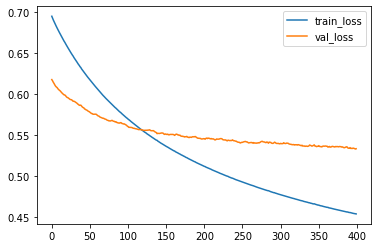

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

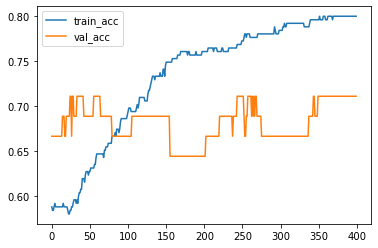

In [6]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

## Regularization
To apply regularization, we just need to modify the layer we added to the model. The argument is `kernel_regularizer`. We would like to set it to be `keras.regularizers.L2(alpha)`, where `alpha` is the regularization strength.

In [7]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))


Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.4928 - accuracy: 0.4000

9/9 [==============================] - 1s 24ms/step - loss: 1.4281 - accuracy: 0.4000 - val_loss: 1.3823 - val_accuracy: 0.4000


Epoch 2/400
1/9 [==>...........................] - ETA: 0s - loss: 1.3250 - accuracy: 0.3667

9/9 [==============================] - 0s 5ms/step - loss: 1.2877 - accuracy: 0.4314 - val_loss: 1.2487 - val_accuracy: 0.4000


Epoch 3/400
1/9 [==>...........................] - ETA: 0s - loss: 1.2043 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 1.1739 - accuracy: 0.4627 - val_loss: 1.1394 - val_accuracy: 0.4222


Epoch 4/400
1/9 [==>...........................] - ETA: 0s - loss: 1.1393 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 1.0809 - accuracy: 0.5137 - val_loss: 1.0521 - val_accuracy: 0.4000


Epoch 5/400
1/9 [==>...........................] - ETA: 0s - loss: 1.0513 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 1.0065 - accuracy: 0.5490 - val_loss: 0.9809 - val_accuracy: 0.5111


Epoch 6/400
1/9 [==>...........................] - ETA: 0s - loss: 0.9736 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.9456 - accuracy: 0.6078 - val_loss: 0.9228 - val_accuracy: 0.5778


Epoch 7/400
1/9 [==>...........................] - ETA: 0s - loss: 0.9141 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.8959 - accuracy: 0.6000 - val_loss: 0.8753 - val_accuracy: 0.5778


Epoch 8/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8835 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.8550 - accuracy: 0.6118 - val_loss: 0.8352 - val_accuracy: 0.6000


Epoch 9/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8508 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.8208 - accuracy: 0.6039 - val_loss: 0.8029 - val_accuracy: 0.6222


Epoch 10/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8150 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.7930 - accuracy: 0.6078 - val_loss: 0.7756 - val_accuracy: 0.6222


Epoch 11/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7670 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.7696 - accuracy: 0.6157 - val_loss: 0.7526 - val_accuracy: 0.6667


Epoch 12/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7529 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.7503 - accuracy: 0.6235 - val_loss: 0.7331 - val_accuracy: 0.6667


Epoch 13/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7709 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.7343 - accuracy: 0.6275 - val_loss: 0.7177 - val_accuracy: 0.6667


Epoch 14/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7201 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.7210 - accuracy: 0.6275 - val_loss: 0.7048 - val_accuracy: 0.6667


Epoch 15/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7582 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.6275 - val_loss: 0.6940 - val_accuracy: 0.6889


Epoch 16/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7170 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.6275 - val_loss: 0.6849 - val_accuracy: 0.6889


Epoch 17/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7416 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.6275 - val_loss: 0.6778 - val_accuracy: 0.6889


Epoch 18/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6939 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.6275 - val_loss: 0.6711 - val_accuracy: 0.6889


Epoch 19/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7050 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.6275 - val_loss: 0.6655 - val_accuracy: 0.6889


Epoch 20/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.6275 - val_loss: 0.6606 - val_accuracy: 0.6889


Epoch 21/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6897 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6737 - accuracy: 0.6275 - val_loss: 0.6572 - val_accuracy: 0.6889


Epoch 22/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7250 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6275 - val_loss: 0.6535 - val_accuracy: 0.6889


Epoch 23/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.7000

9/9 [==============================] - 0s 13ms/step - loss: 0.6680 - accuracy: 0.6275 - val_loss: 0.6504 - val_accuracy: 0.6889


Epoch 24/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6455 - accuracy: 0.7000

9/9 [==============================] - 0s 7ms/step - loss: 0.6657 - accuracy: 0.6275 - val_loss: 0.6479 - val_accuracy: 0.6889


Epoch 25/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6499 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.6275 - val_loss: 0.6458 - val_accuracy: 0.6889


Epoch 26/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6852 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6623 - accuracy: 0.6275 - val_loss: 0.6440 - val_accuracy: 0.6889


Epoch 27/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6275 - val_loss: 0.6426 - val_accuracy: 0.6889


Epoch 28/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6275 - val_loss: 0.6416 - val_accuracy: 0.6889


Epoch 29/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6735 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.6275 - val_loss: 0.6405 - val_accuracy: 0.6889


Epoch 30/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6872 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6275 - val_loss: 0.6398 - val_accuracy: 0.6889


Epoch 31/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6701 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6275 - val_loss: 0.6388 - val_accuracy: 0.6889


Epoch 32/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.6275 - val_loss: 0.6385 - val_accuracy: 0.6889


Epoch 33/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6155 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.6275 - val_loss: 0.6380 - val_accuracy: 0.6889


Epoch 34/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6957 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.6275 - val_loss: 0.6369 - val_accuracy: 0.6889


Epoch 35/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6350 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6275 - val_loss: 0.6363 - val_accuracy: 0.6889


Epoch 36/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6797 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6275 - val_loss: 0.6356 - val_accuracy: 0.6889


Epoch 37/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6526 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6275 - val_loss: 0.6354 - val_accuracy: 0.6889


Epoch 38/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6333

9/9 [==============================] - 0s 7ms/step - loss: 0.6549 - accuracy: 0.6275 - val_loss: 0.6354 - val_accuracy: 0.6889


Epoch 39/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6777 - accuracy: 0.5667

9/9 [==============================] - 0s 7ms/step - loss: 0.6548 - accuracy: 0.6275 - val_loss: 0.6347 - val_accuracy: 0.6889


Epoch 40/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6275 - val_loss: 0.6345 - val_accuracy: 0.6889


Epoch 41/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6275 - val_loss: 0.6341 - val_accuracy: 0.6889


Epoch 42/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6341 - val_accuracy: 0.6889


Epoch 43/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6337 - val_accuracy: 0.6889


Epoch 44/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6099 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6338 - val_accuracy: 0.6889


Epoch 45/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.6275 - val_loss: 0.6336 - val_accuracy: 0.6889


Epoch 46/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6080 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.6275 - val_loss: 0.6333 - val_accuracy: 0.6889


Epoch 47/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6220 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6538 - accuracy: 0.6275 - val_loss: 0.6331 - val_accuracy: 0.6889


Epoch 48/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6779 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.6327 - val_accuracy: 0.6889


Epoch 49/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6275 - val_loss: 0.6327 - val_accuracy: 0.6889


Epoch 50/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6392 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6324 - val_accuracy: 0.6889


Epoch 51/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.6275 - val_loss: 0.6319 - val_accuracy: 0.6889


Epoch 52/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5840 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 53/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6436 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6889


Epoch 54/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7296 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6889


Epoch 55/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6309 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6320 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6319 - val_accuracy: 0.6889


Epoch 57/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6360 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 58/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6315 - val_accuracy: 0.6889


Epoch 59/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6386 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 60/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6310 - val_accuracy: 0.6889


Epoch 61/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6879 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6309 - val_accuracy: 0.6889


Epoch 62/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6764 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6308 - val_accuracy: 0.6889


Epoch 63/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6587 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6310 - val_accuracy: 0.6889


Epoch 64/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6124 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6307 - val_accuracy: 0.6889


Epoch 65/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 66/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6741 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 67/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 68/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6994 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 69/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6196 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6300 - val_accuracy: 0.6889


Epoch 70/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5831 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6300 - val_accuracy: 0.6889


Epoch 71/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6506 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 72/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 73/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6574 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6299 - val_accuracy: 0.6889


Epoch 74/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6509 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 75/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6604 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 76/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 77/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6547 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 78/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7108 - accuracy: 0.5000



9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 79/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6351 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 80/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6727 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 81/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6318 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6795 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 83/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6379 - accuracy: 0.6667

9/9 [==============================] - 0s 9ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 84/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6653 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 85/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 86/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6568 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 87/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6437 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 88/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6286 - val_accuracy: 0.6889


Epoch 89/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6320 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 90/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6606 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 91/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6449 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 92/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 93/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6014 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 94/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5882 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 95/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6118 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 96/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6157 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 97/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6703 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 98/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 99/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 100/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 101/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 102/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6416 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 104/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 105/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7134 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 106/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6322 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 107/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 108/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 109/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7332 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 110/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7340 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 111/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 112/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6424 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6117 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 114/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 115/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6469 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 116/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6796 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 118/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 119/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6403 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 120/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6687 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 121/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6416 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 122/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 123/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6206 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 124/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 125/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 126/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 127/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 128/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 129/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6606 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 130/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6572 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 131/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6131 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 133/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6491 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 134/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6764 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6259 - val_accuracy: 0.6889


Epoch 135/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6365 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 136/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 137/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6825 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 138/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5824 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 139/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6773 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 140/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 142/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6439 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 143/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6441 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 144/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6979 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 145/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6203 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 146/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 147/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6814 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 148/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 149/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 150/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6857 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 151/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6304 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 152/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6777 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 153/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 154/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6854 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 155/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 156/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 157/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7097 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 158/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6794 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 159/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 160/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 161/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 162/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6611 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 163/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6701 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 164/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6651 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 165/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 166/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 167/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6667



9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 168/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6108 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 169/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5765 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 170/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7131 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 171/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 172/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 173/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6263 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 174/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6523 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 175/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6399 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 176/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6055 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 177/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 178/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6979 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 179/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6999 - accuracy: 0.5333

9/9 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 180/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.6000

9/9 [==============================] - 0s 6ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 181/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6641 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 182/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 183/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 184/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 185/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 186/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6748 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 187/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6342 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 188/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 189/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 190/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 191/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6806 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 192/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6961 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 193/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 194/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 195/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 196/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 197/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6742 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 198/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6734 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 200/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6604 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 201/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5630 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 202/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7126 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 203/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 204/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6829 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 205/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 206/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5944 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 207/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6277 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 208/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 209/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6940 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 210/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 211/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 212/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 213/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6943 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 214/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6104 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 215/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 216/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 217/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6319 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6777 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 219/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6030 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 220/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6234 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 221/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7033 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 222/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7512 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 223/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5921 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 224/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 225/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 226/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 227/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5596 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6587 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 229/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 230/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6447 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 231/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6406 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 232/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 233/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 234/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6420 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 235/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 236/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 237/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 238/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 239/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 240/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6553 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 241/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6556 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 242/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6491 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 243/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6683 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 245/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7607 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 246/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 247/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 248/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6621 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 249/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 250/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7028 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 251/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 252/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 253/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 254/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6011 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 255/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6706 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 256/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6636 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 258/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6372 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 259/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 260/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 261/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 262/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5938 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 263/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 264/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 265/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7347 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 266/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 267/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6952 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 268/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7055 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 269/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 270/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6117 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 271/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 272/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6547 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 273/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 274/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 275/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6122 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 276/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6152 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 277/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 278/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5816 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 279/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 280/400

1/9 [==>...........................] - ETA: 0s - loss: 0.5959 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 281/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6657 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 282/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6243 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 283/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 284/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6888 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 285/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 286/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6061 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 287/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5981 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 288/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6523 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 289/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 290/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 291/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 292/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5676 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 293/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6870 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 294/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 295/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6470 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 296/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5868 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 297/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6830 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 298/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 299/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6381 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 300/400

1/9 [==>...........................] - ETA: 0s - loss: 0.7057 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 301/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6402 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 302/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7705 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 303/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6077 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 305/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 306/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6830 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 307/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6763 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 308/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6629 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 309/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6449 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 310/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 311/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 312/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6033 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 313/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 314/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6194 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 315/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7023 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 316/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 317/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 318/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 319/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 320/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 321/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 322/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 323/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7332 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 324/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 325/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 326/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6888 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 327/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6771 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 328/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6372 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 329/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 330/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6156 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 331/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 332/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 333/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 334/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 335/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6237 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 336/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 337/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7103 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 338/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 339/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 340/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6673 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 342/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6125 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 343/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 344/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7595 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 345/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6336 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 346/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6352 - accuracy: 0.6333



9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 347/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6924 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 348/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 349/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6811 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 350/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6109 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 351/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 352/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 353/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7003 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 354/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 355/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5725 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 356/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6836 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 357/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7351 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6461 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 359/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 360/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7267 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 361/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5802 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6718 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 363/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 364/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6594 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 365/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 366/400

1/9 [==>...........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 367/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 368/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 369/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 370/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6496 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 371/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 372/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6279 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 373/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 374/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 375/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 376/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6571 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 377/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 378/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 379/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6026 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 380/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 381/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6501 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 382/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7050 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 383/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 384/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6587 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7025 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 386/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 387/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 388/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7419 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 390/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 391/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6078 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 392/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6263 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 393/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6423 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 394/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6563 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 395/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6510 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 396/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6721 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 397/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 398/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5866 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 399/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 400/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


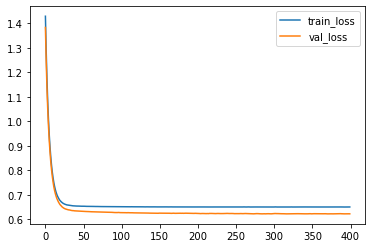

In [8]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

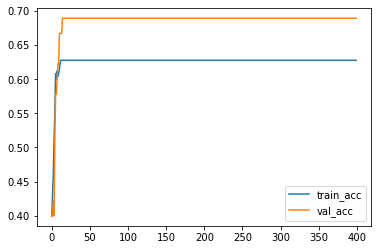

In [9]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

You may compare what we get here with the codes we get before.